Degree centrality
CS_LDA Ttest_indResult(statistic=-3.0443924717630426, pvalue=0.0024607551340808742)
CS_OCT Ttest_indResult(statistic=-4.863757719525268, pvalue=1.7982566970200145e-06)


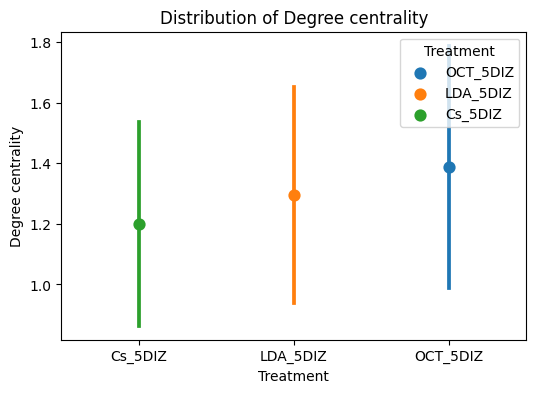

In-degree centrality
CS_LDA Ttest_indResult(statistic=-2.7141114952851186, pvalue=0.006890360590993634)
CS_OCT Ttest_indResult(statistic=-4.521581699871965, pvalue=8.462437202951386e-06)


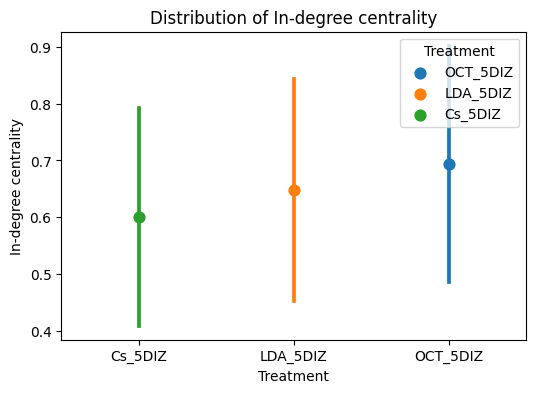

Out-degree centrality
CS_LDA Ttest_indResult(statistic=-2.579383327093576, pvalue=0.010197538194211939)
CS_OCT Ttest_indResult(statistic=-4.245551072055429, pvalue=2.8264084074165885e-05)


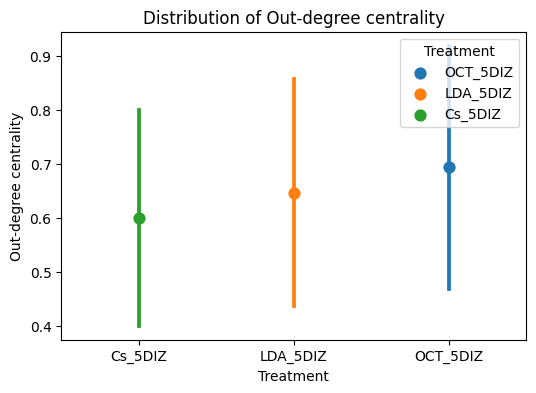

Closeness centrality
CS_LDA Ttest_indResult(statistic=-2.594441732955101, pvalue=0.009766160489229266)
CS_OCT Ttest_indResult(statistic=-4.72584240722922, pvalue=3.4108101073322355e-06)


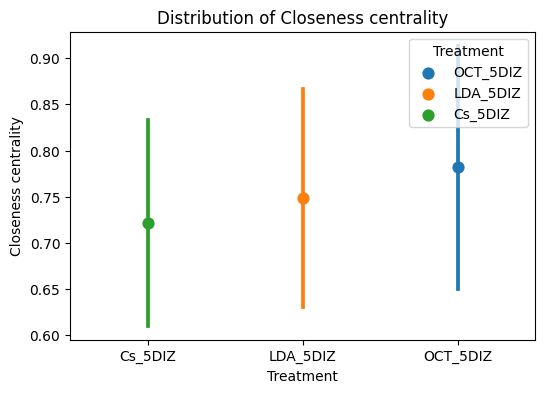

In-Strength distribution, w=count
CS_LDA Ttest_indResult(statistic=-3.744547516351661, pvalue=0.00020168549784246555)
CS_OCT Ttest_indResult(statistic=-5.901242873726615, pvalue=1.4912976765481702e-08)


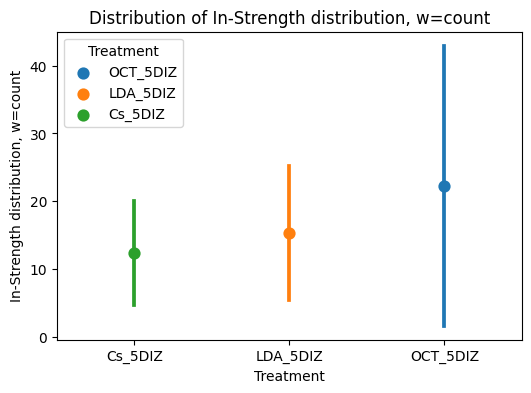

Out-Strength distribution, w=count
CS_LDA Ttest_indResult(statistic=-3.618941384108167, pvalue=0.0003259230167628343)
CS_OCT Ttest_indResult(statistic=-5.923561488620116, pvalue=1.3446262294991396e-08)


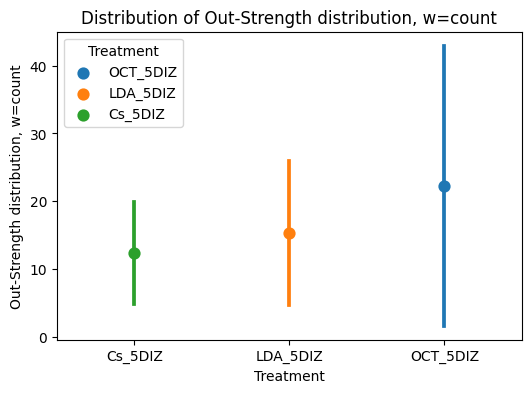

In-Strength distribution, w=duration
CS_LDA Ttest_indResult(statistic=-2.887588741449439, pvalue=0.004050578165937693)
CS_OCT Ttest_indResult(statistic=-5.24092343197007, pvalue=4.3276203397811324e-07)


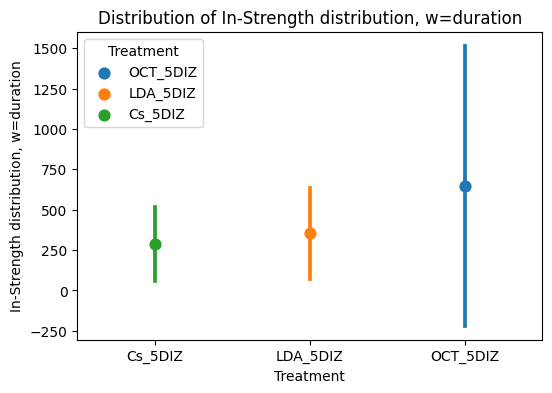

Out-Strength distribution, w=duration
CS_LDA Ttest_indResult(statistic=-2.8858302566720178, pvalue=0.004072085821145692)
CS_OCT Ttest_indResult(statistic=-5.293459403593798, pvalue=3.407919876322046e-07)


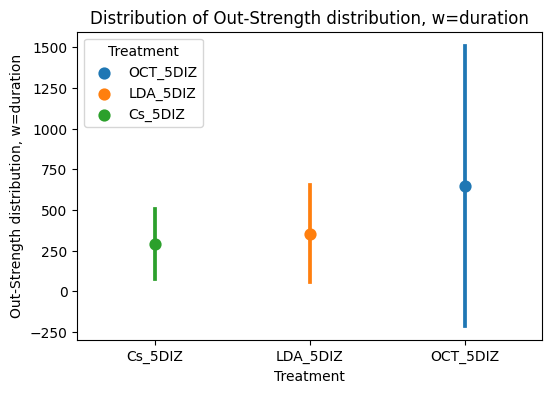

Weighted Degree (count)
CS_LDA Ttest_indResult(statistic=-3.8813586193796943, pvalue=0.00011775601174430452)
CS_OCT Ttest_indResult(statistic=-6.032192001259229, pvalue=7.765296719858093e-09)


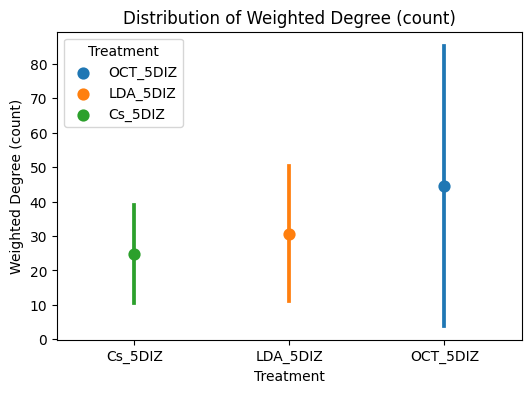

Weighted Degree (duration)
CS_LDA Ttest_indResult(statistic=-3.0196498549102238, pvalue=0.002659530737906121)
CS_OCT Ttest_indResult(statistic=-5.3621946996557766, pvalue=2.4581959086224503e-07)


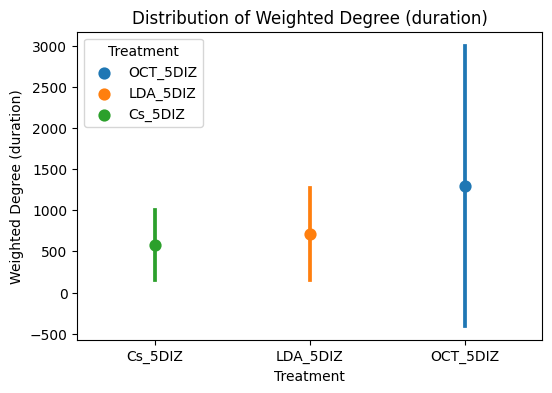

In-degree
CS_LDA Ttest_indResult(statistic=-2.7141114952851164, pvalue=0.0068903605909936775)
CS_OCT Ttest_indResult(statistic=-4.521581699871969, pvalue=8.462437202951244e-06)


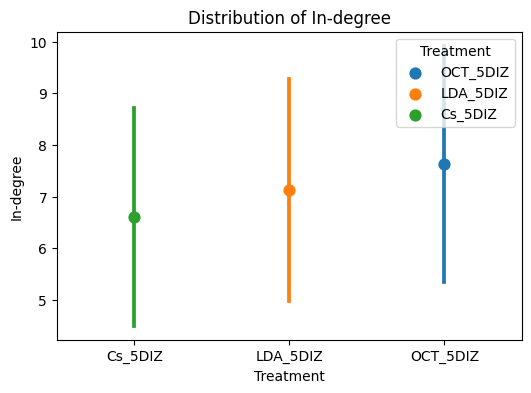

Out-degree
CS_LDA Ttest_indResult(statistic=-2.5793833270935678, pvalue=0.010197538194212173)
CS_OCT Ttest_indResult(statistic=-4.245551072055423, pvalue=2.8264084074166665e-05)


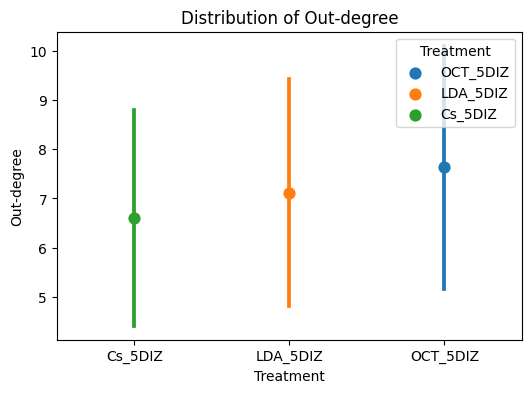

Betweenness centrality w=None
CS_OCT Ttest_indResult(statistic=3.3345631070712853, pvalue=0.0009420187502778271)


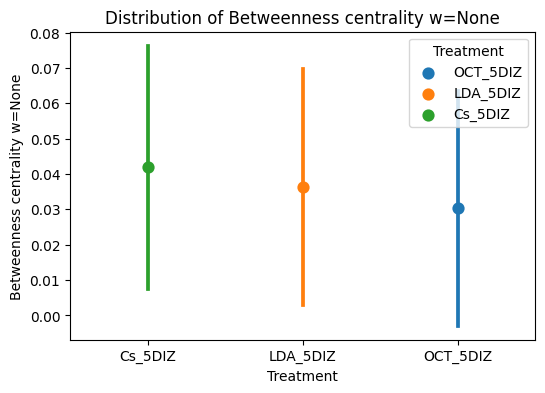

Clustering coefficient w=None
CS_LDA Ttest_indResult(statistic=-3.749955075958975, pvalue=0.00019879877821938716)
CS_OCT Ttest_indResult(statistic=-6.715532588692522, pvalue=7.8843584780121e-11)


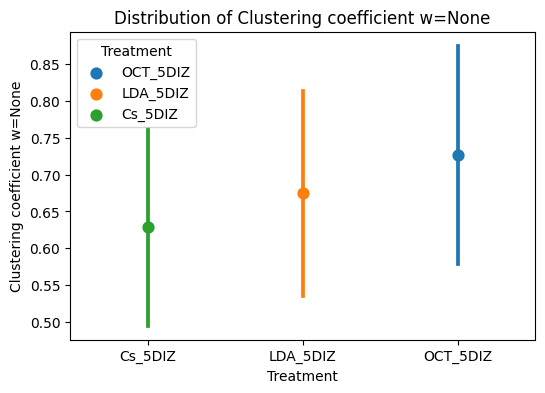

Clustering coefficient w=count
CS_LDA Ttest_indResult(statistic=-3.087039204122621, pvalue=0.002133911673749924)


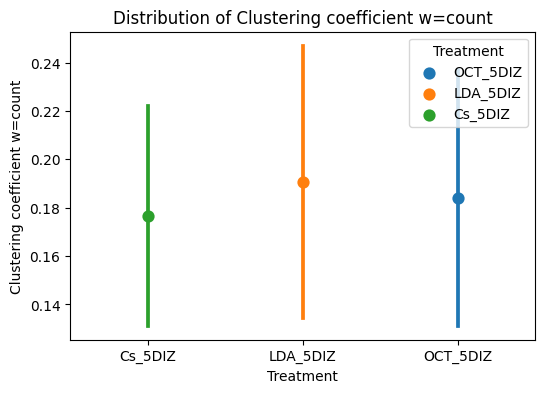

Clustering coefficient w=duration
CS_LDA Ttest_indResult(statistic=-3.2283822044636654, pvalue=0.001327357245970649)


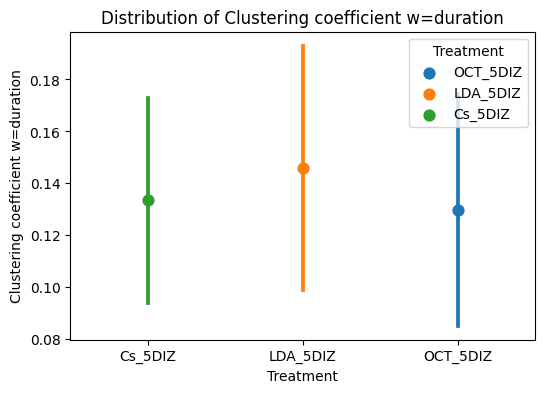

In [1]:
import os
import toml
import scipy
import pandas as pd
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from src import settings
from src.utils import fileio

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)  
INPUT_PATH = os.path.join(settings.RESULTS_DIR, "local_measures")
all_treatments = fileio.load_multiple_folders(INPUT_PATH)
all_treatments = {key: value for key, value in all_treatments.items() if key in config["TREATMENTS"]}

treatment_dataframes = pd.DataFrame()
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)

    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)
        df.rename_axis("Fly")
        df['Treatment'] = treatment_name
        df['Group'] = group_name.replace(".csv", "")
        treatment_dataframes = pd.concat([treatment_dataframes, df])

treatment_dataframes = treatment_dataframes.set_index('Treatment', append=True)
treatment_dataframes = treatment_dataframes.set_index('Group',append=True)

combined_data_reset = treatment_dataframes.reset_index()

order = ["Cs_5DIZ", "LDA_5DIZ", "OCT_5DIZ"] 
for measure_name in treatment_dataframes.columns:
    sum_Cs_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='Cs_5DIZ']
    sum_LDA_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='LDA_5DIZ']
    sum_OCT_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='OCT_5DIZ']

    CS_LDA = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_LDA_5DIZ[measure_name], equal_var=False)
    CS_OCT = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_OCT_5DIZ[measure_name], equal_var=False)
    # LDA_OCT = scipy.stats.ttest_ind(sum_OCT_5DIZ[measure_name], sum_LDA_5DIZ[measure_name], equal_var=False)


    if CS_LDA.pvalue < 0.05 or CS_OCT.pvalue < 0.05:
        print(measure_name)
        if CS_LDA.pvalue < 0.05:
            print(f'CS_LDA {CS_LDA}')

        if CS_OCT.pvalue < 0.05:
            print(f'CS_OCT {CS_OCT}')

        plt.figure(figsize=(6, 4))
        sns.pointplot(data=combined_data_reset, x="Treatment", y=measure_name, hue='Treatment',errorbar='sd', order=order)
        plt.xlabel("Treatment")
        plt.ylabel(measure_name)
        plt.title(f'Distribution of {measure_name}')
        plt.show()

        print("="*100)